<a href="https://colab.research.google.com/github/Sujay2810/Projects/blob/main/Electric_Vehicle_Market_Size_Analysis_By_County.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

# Load dataset
df = pd.read_csv('Electric_Vehicle_Population_Size_History_By_County.csv')

# Clean & convert 'Date' column
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Drop rows with missing essential values
df.dropna(subset=['Date', 'Electric Vehicle (EV) Total'], inplace=True)

# Quick check
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27510 entries, 0 to 27509
Data columns (total 10 columns):
 #   Column                                    Non-Null Count  Dtype         
---  ------                                    --------------  -----         
 0   Date                                      27510 non-null  datetime64[ns]
 1   County                                    27409 non-null  object        
 2   State                                     27409 non-null  object        
 3   Vehicle Primary Use                       27510 non-null  object        
 4   Battery Electric Vehicles (BEVs)          27510 non-null  int64         
 5   Plug-In Hybrid Electric Vehicles (PHEVs)  27510 non-null  int64         
 6   Electric Vehicle (EV) Total               27510 non-null  int64         
 7   Non-Electric Vehicle Total                27510 non-null  int64         
 8   Total Vehicles                            27510 non-null  int64         
 9   Percent Electric Vehicles   

/tmp/ipython-input-4-38595928.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_ev = df.set_index('Date').resample('M')['Electric Vehicle (EV) Total'].sum()


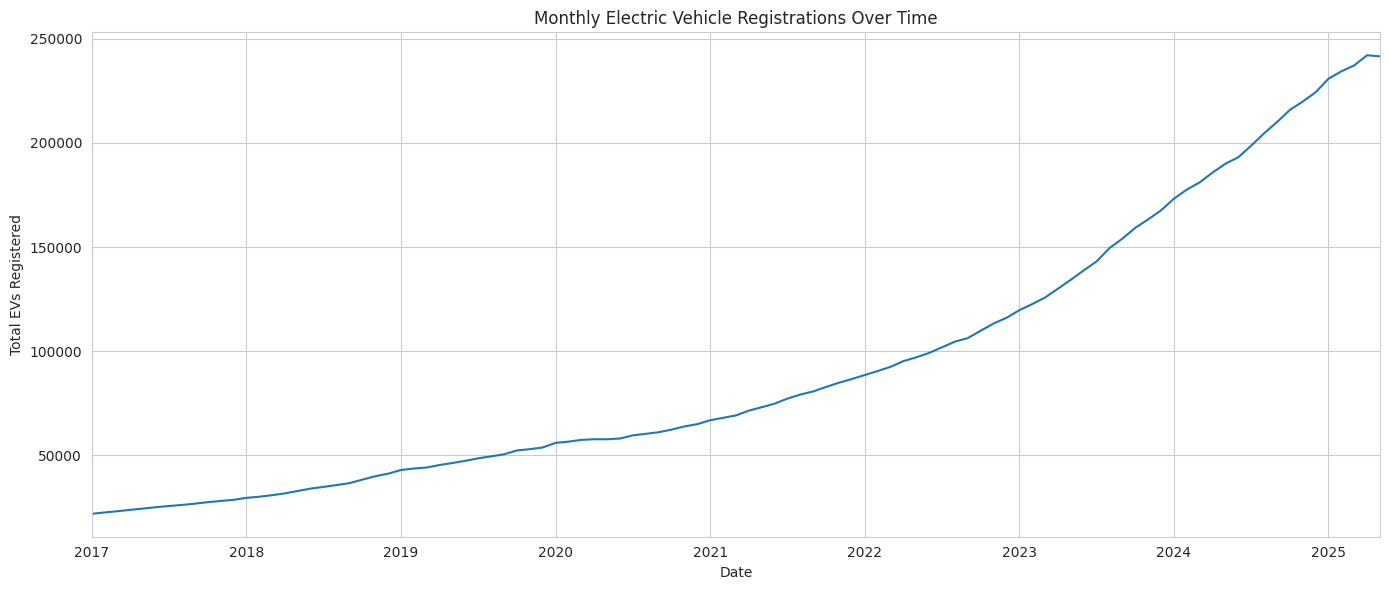

In [ ]:
# Group by month
monthly_ev = df.set_index('Date').resample('M')['Electric Vehicle (EV) Total'].sum()

plt.figure(figsize=(14, 6))
monthly_ev.plot()
plt.title("Monthly Electric Vehicle Registrations Over Time")
plt.xlabel("Date")
plt.ylabel("Total EVs Registered")
plt.grid(True)
plt.tight_layout()
plt.show()


/tmp/ipython-input-5-3926929362.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_states.values, y=top_states.index, palette="viridis")


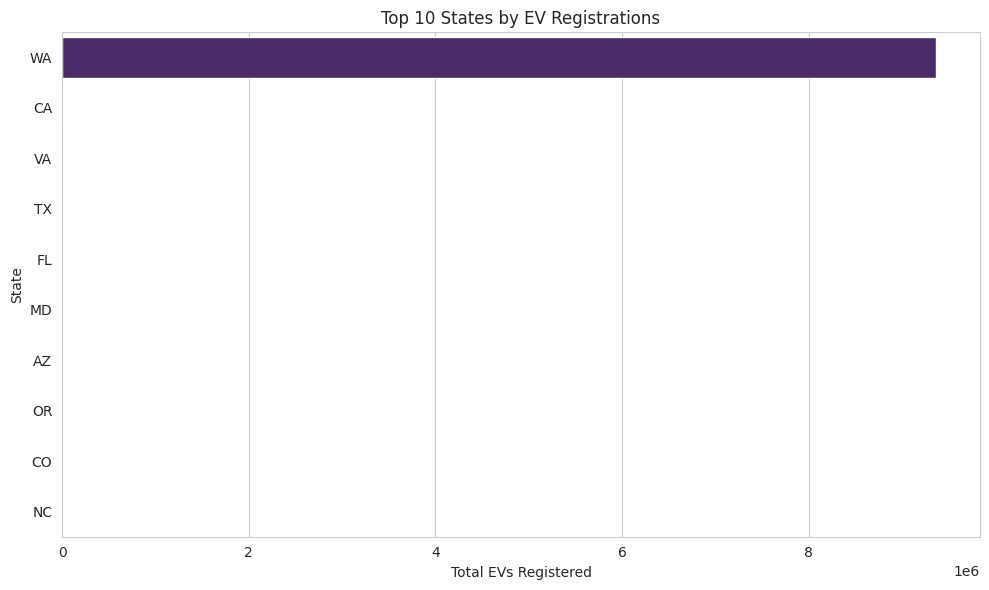

In [ ]:
top_states = df.groupby('State')['Electric Vehicle (EV) Total'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_states.values, y=top_states.index, palette="viridis")
plt.title("Top 10 States by EV Registrations")
plt.xlabel("Total EVs Registered")
plt.ylabel("State")
plt.tight_layout()
plt.show()


/tmp/ipython-input-6-546879745.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_county_share.values, y=top_county_share.index, palette="magma")


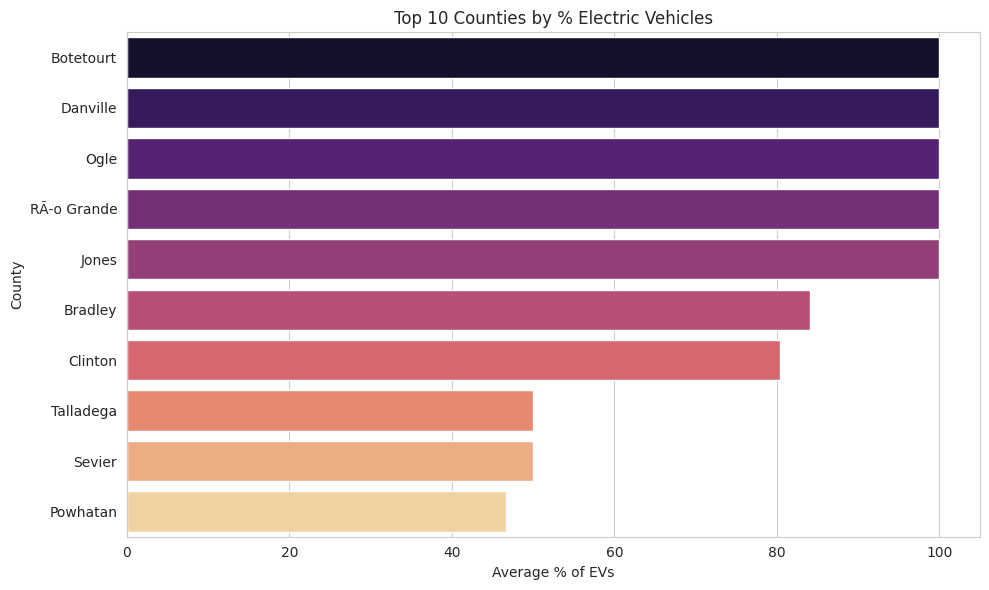

In [ ]:
top_county_share = df.groupby('County')['Percent Electric Vehicles'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_county_share.values, y=top_county_share.index, palette="magma")
plt.title("Top 10 Counties by % Electric Vehicles")
plt.xlabel("Average % of EVs")
plt.ylabel("County")
plt.tight_layout()
plt.show()


/tmp/ipython-input-7-2568082082.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ev_type_sum.index, y=ev_type_sum.values, palette='rocket')


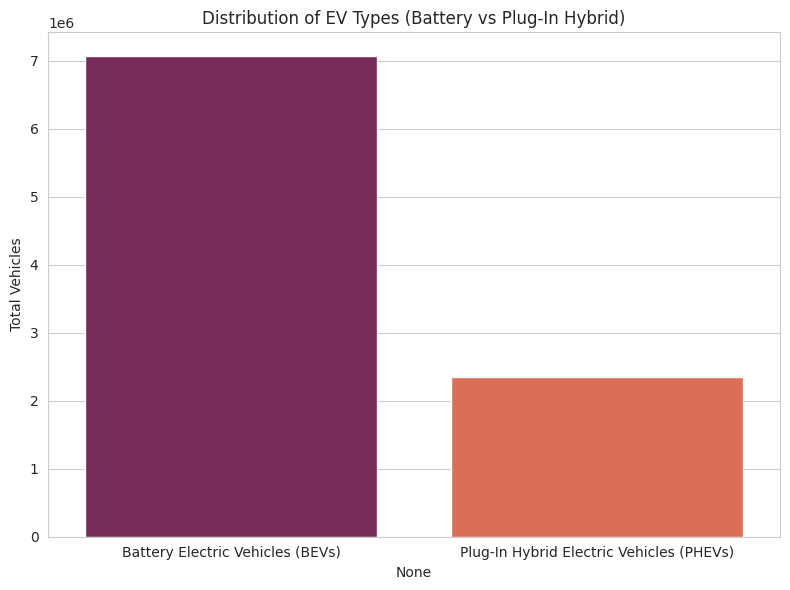

In [ ]:
ev_type_sum = df[['Battery Electric Vehicles (BEVs)', 'Plug-In Hybrid Electric Vehicles (PHEVs)']].sum()

plt.figure(figsize=(8, 6))
sns.barplot(x=ev_type_sum.index, y=ev_type_sum.values, palette='rocket')
plt.title("Distribution of EV Types (Battery vs Plug-In Hybrid)")
plt.ylabel("Total Vehicles")
plt.tight_layout()
plt.show()


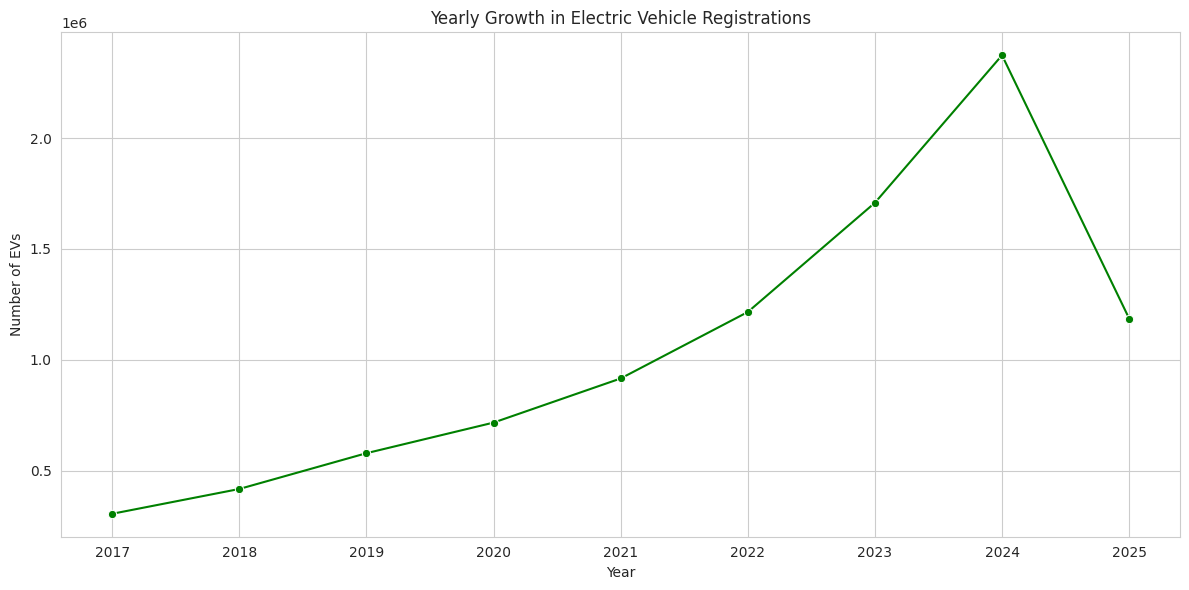

In [ ]:
df['Year'] = df['Date'].dt.year
yearly_ev = df.groupby('Year')['Electric Vehicle (EV) Total'].sum()

plt.figure(figsize=(12, 6))
sns.lineplot(x=yearly_ev.index, y=yearly_ev.values, marker='o', color='green')
plt.title("Yearly Growth in Electric Vehicle Registrations")
plt.xlabel("Year")
plt.ylabel("Number of EVs")
plt.grid(True)
plt.tight_layout()
plt.show()


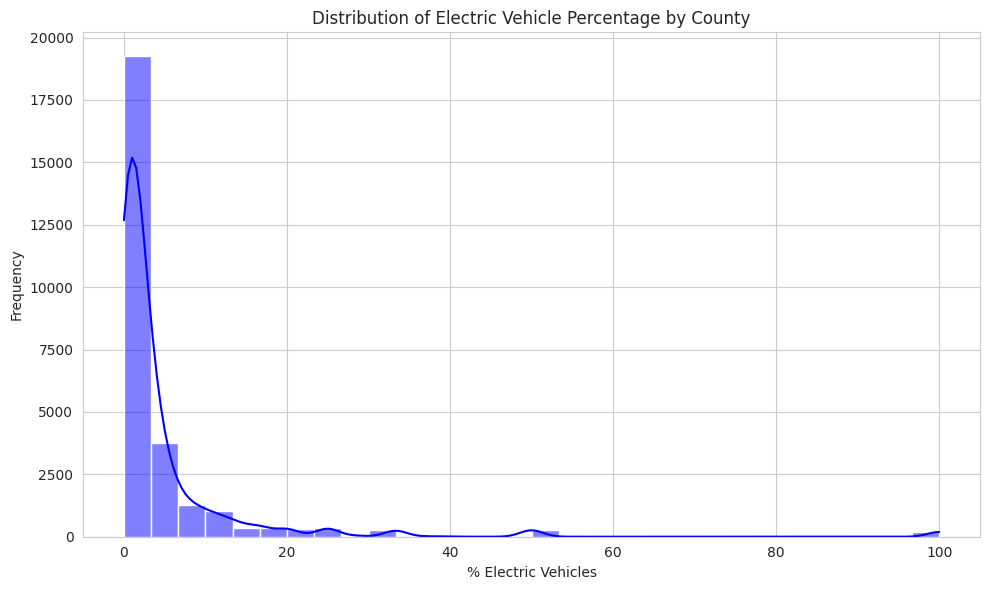

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Percent Electric Vehicles'], bins=30, kde=True, color='blue')
plt.title("Distribution of Electric Vehicle Percentage by County")
plt.xlabel("% Electric Vehicles")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


/tmp/ipython-input-12-382518637.py:22: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_lstm = df_lstm.set_index('Date').resample('M').sum()  # Sum of EVs registered per month


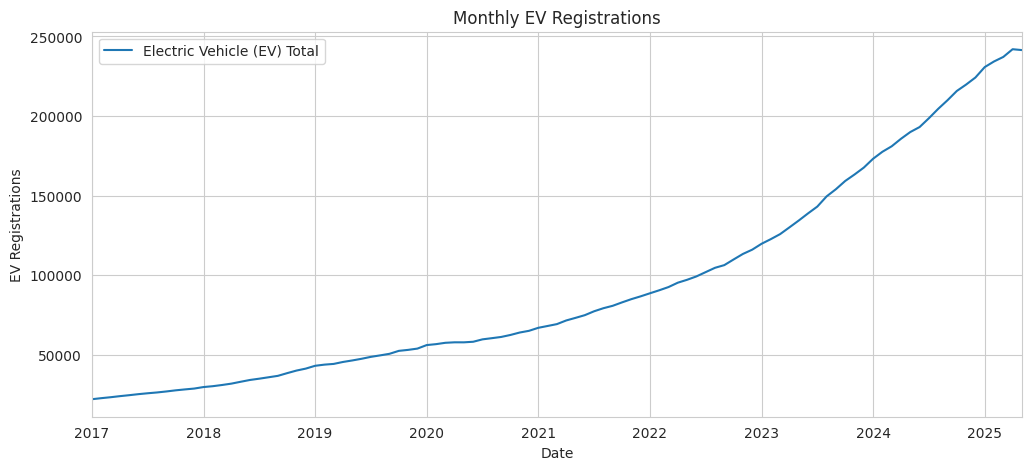

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - loss: 0.0576 - val_loss: 0.3492
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0257 - val_loss: 0.1301
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0102 - val_loss: 0.0507
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0078 - val_loss: 0.0557
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0057 - val_loss: 0.0461
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0025 - val_loss: 0.0172
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0024 - val_loss: 0.0010
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0012 - val_loss: 0.0013
Epoch 9/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 9.0777e-04 - val_loss: 0.0049
Epoch 10/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 6.5954e-04 - val_loss: 0.0104
Epoch 11/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 8.5101e-04 - val_loss: 0.0214
Epoch 12/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step

/tmp/ipython-input-12-382518637.py:74: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(df_lstm.index[-1] + pd.DateOffset(months=1), periods=6, freq='M')


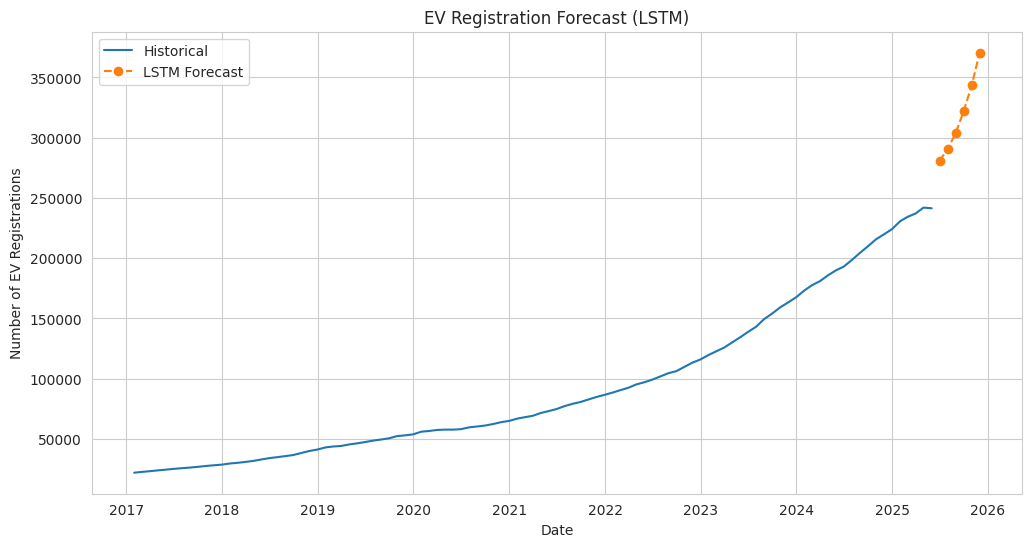

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# STEP 1: Load data
df = pd.read_csv('Electric_Vehicle_Population_Size_History_By_County.csv')  # Use your actual path

# STEP 2: Preprocessing
# Convert 'Date' to datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Drop rows where Date or Electric Vehicles count is missing
df = df.dropna(subset=['Date', 'Electric Vehicle (EV) Total'])

# Keep only relevant columns
df_lstm = df[['Date', 'Electric Vehicle (EV) Total']].copy()

# Group by month (or year, if preferred)
df_lstm = df_lstm.set_index('Date').resample('M').sum()  # Sum of EVs registered per month

# Plot raw data
df_lstm.plot(figsize=(12, 5), title='Monthly EV Registrations')
plt.xlabel("Date")
plt.ylabel("EV Registrations")
plt.show()

# STEP 3: Normalize & Prepare Sequences
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df_lstm)

SEQ_LEN = 5  # number of past months to use
def create_sequences(data, seq_len):
    X, y = [], []
    for i in range(len(data) - seq_len):
        X.append(data[i:i+seq_len])
        y.append(data[i+seq_len])
    return np.array(X), np.array(y)

X, y = create_sequences(scaled_data, SEQ_LEN)

# Split into train/test
split = int(len(X) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# STEP 4: Build & Train LSTM
model = Sequential([
    LSTM(50, activation='tanh', input_shape=(SEQ_LEN, 1)),
    Dropout(0.2),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=100, batch_size=8, validation_data=(X_test, y_test), verbose=1)

# STEP 5: Forecast future
def forecast_lstm(model, last_seq, steps=6):
    seq = last_seq.copy()
    preds = []
    for _ in range(steps):
        pred = model.predict(seq.reshape(1, SEQ_LEN, 1))[0, 0]
        preds.append(pred)
        seq = np.roll(seq, -1)
        seq[-1] = pred
    return np.array(preds)

last_seq = scaled_data[-SEQ_LEN:]
future_preds_scaled = forecast_lstm(model, last_seq, steps=6)
future_preds = scaler.inverse_transform(future_preds_scaled.reshape(-1, 1)).flatten()

# STEP 6: Visualize Results
forecast_index = pd.date_range(df_lstm.index[-1] + pd.DateOffset(months=1), periods=6, freq='M')
forecast_series = pd.Series(future_preds, index=forecast_index)

plt.figure(figsize=(12, 6))
plt.plot(df_lstm.index, df_lstm['Electric Vehicle (EV) Total'], label='Historical')
plt.plot(forecast_series.index, forecast_series, label='LSTM Forecast', linestyle='--', marker='o')
plt.title("EV Registration Forecast (LSTM)")
plt.xlabel("Date")
plt.ylabel("Number of EV Registrations")
plt.legend()
plt.grid(True)
plt.show()
